# Optimizer project

We'll discuss common optimization algorithms used in training deep learning models

## What is an Objective Function?

In order to find the optimal solution, we need some way of measuring the quality of any solution. This is done via what is known as an objective function, with “objective” used in the sense of a goal. Usually, neural networks are trained to minimize a loss function, a subset of objective functions where the "objective" is to minimize its value.

<br>
Example of an objective function: Binary Cross Entropy Loss

Loss Function:  $-(y \log(p) \ + \ (1-y) \log(1-p))$

<br>

In binary cross entropy, a sigmoid function squashes the network's output range to be 0<$p$<1, where $p$ is the score output by the network. $y$ is the true value of the label and can be either $1$ or $0$.

For a particular example with a $y=1$, gradient descent minimizes $-\log(p)$. Since this negative log-likelihood is minimized when $p$ is maximized, the network will minimize its loss when $p=1$.
When $y=0$, gradient descent minimizes $-\log(1-p)$, and loss is minimized when $p=0$.

Note:
Having two outputs with softmax activation is a redundant version of one output using sigmoid for binary classification. The score $p$ should not be thought of as a true probability, but a metric for which an arbitrary division boundary can be set to divide input examples into two groups. This can be used to construct a precision-recall curve of a binary classifier. These scores do not correlate with the network's confidence in a prediction.

In [1]:
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.5.0


In [2]:
# Define the function we will be optimizing in this lab
def rosenbrock(x, y):
  a = 1
  b = 100
  return (a - x) ** 2 + b * (y - x**2)**2

# Define helper functions called throughout the lab
def plot_contour(visited_x, visited_y):
  plt.clf()
  x_range = np.arange(-4, 4, .1)
  y_range = np.arange(-4, 6, .1)
  xx, yy = np.meshgrid(x_range, y_range)
  z = np.sqrt(rosenbrock(xx, yy))
  plt.contourf(x_range, y_range, z, levels=100)
  plt.scatter(visited_x, visited_y, c='r')
  plt.scatter([1], [1], c='y')
  plt.show()

def optimize(optimizer):
  parameters = tf.Variable([-3, -3], dtype=tf.float32)
  visited_x = []
  visited_y = []
  visited_x.append(parameters[0].numpy())
  visited_y.append(parameters[1].numpy())
  for i in range(1000):
    with tf.GradientTape() as tape:
      loss = rosenbrock(parameters[0], parameters[1])
    gradients = tape.gradient(loss, [parameters])[0]
    optimizer.apply_gradients([(gradients, parameters)])
    visited_x.append(parameters[0].numpy())
    visited_y.append(parameters[1].numpy())
  plot_contour(visited_x, visited_y)
  return parameters.numpy()


## Optimizing the Rosenbrock function

In this project, we will be testing our optimization algorithms on the Rosenbrock function, which is a non-convex function used as a performance test problem for optimization algorithms. $\theta$ is the parameters of the loss function, and would be the weights if we were training a neural network. These are the values that the optimizer is allowed to modify while minimizing the loss.

$$
L(\theta^{(1)}, \theta^{(2)}) = (1 - \theta^{(1)})^2 + 100 \times (\theta^{(2)} - (\theta^{(1)})^2)^2
$$

Run the following code to plot a contour plot of this function. The Rosenbrock function features a narrow valley, and has a minimum value at (1, 1). Finding the valley is easy for most gradient descent algorithms. However, it is a challenge to find the minimum along this valley. 


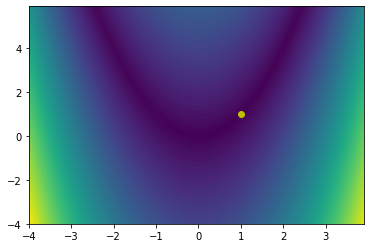

In [3]:
plot_contour([], [])

# (Stochastic) Gradient Descent

To train neural networks, we can change their parameters $\theta$ in a way to minimize a loss function. In order to decide what weight changes would best minimize the loss function, we calculate the gradient of the loss with respect to the parameters, which indicates the direction of steepest ascent.

Thus, we subtract the gradient scaled by some learning rate/scaling factor $\alpha$ and we arrive at the formula to update the parameters.

$$\theta_t = \theta_{t-1} - \alpha \nabla L(\theta_{t-1})$$

<br>

Though this formula might be very familiar, it does not represent specifically the procedure of Stochastic Gradient Descent, which is more accurate in describing the way deep networks are trained.

<br>

Standard "batch" gradient descent refers to evaluating the entire dataset and averaging the calculated gradients to update the weights. This is not used to train networks as not only is it very expensive to evaluate the gradient on the entire dataset for every iteration, this also generally leads the network to solutions that overfit and do not generalize.

Stochastic gradient descent is where random subsets, "mini-batches", of the training data are chosen to approximate the true gradient. Though it would increase stochasticity and decrease compute time to evaluate the gradient on single examples, the variance of gradient between single examples generally prevents the network from converging to neither quick nor effective solutions. Thus, the mini-batch size remains an important parameter that can make significant differences in the convergence, training time, or generalization of the network for non-trivial tasks.

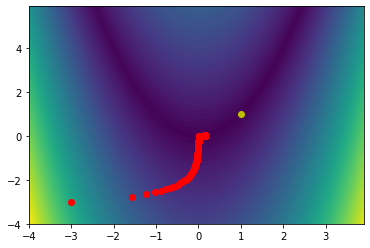

[0.15439285 0.02152821]


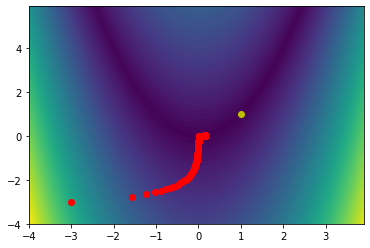

[0.15439285 0.02152821]


In [4]:
# Tensorflow implementation of SGD
print(optimize(tf.keras.optimizers.SGD(learning_rate=0.0001)))

# Our implementation of SGD
class SGD:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
      
  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    parameters.assign(parameters - self.learning_rate * gradients)
    
print(optimize(SGD(0.0001)))

# Gradient Descent With Momentum

Gradient descent can easily find the valley of the Rosenbrock function, but since the magnitude of the gradient is so low along the valley, gradient descent gets stuck. 

With momentum, the parameters move by some fraction of the previous step along with the current gradient. This is similar to how a ball rolling down a hill will speed up over time. 


$$v_t = \lambda v_{t-1} + \alpha \nabla L(\theta)$$

$$\theta_t = \theta_{t-1} - v_t$$

An additional variable $v$ is used to keep track of the velocity. When $\lambda = 0$, it's as if the ball is rolling on a frictionless surface, since it will keep all of it's previous velocity. A typical value for $\lambda$ is $0.9$.


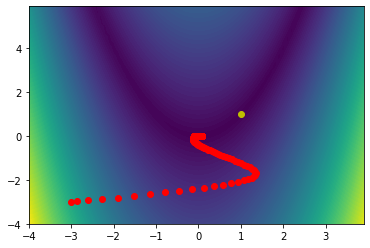

[0.08393675 0.00565818]


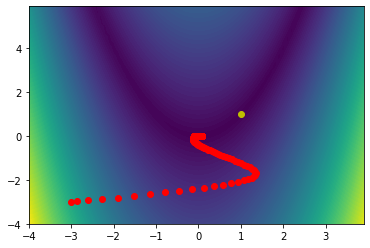

[0.08393682 0.00565819]


In [5]:
learning_rate = 0.00001
lambda_ = 0.9

# Tensorflow implementation of SGD with momentum
print(optimize(tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=lambda_)))


# Our implementation of SGD with momentum
class SGDMomentum:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.v = 0  # Zero vector for velocity
    self.lambda_ = lambda_
      
  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    
    # TODO: Fill in the blanks
    self.v = self.v * lambda_ + learning_rate * gradients
    parameters.assign(parameters - self.v)
    
print(optimize(SGDMomentum(learning_rate=learning_rate)))

# Adagrad

Adagrad adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters. Among other things, it is used to train GloVe word embeddings, as infrequent words require much larger updates than frequent ones.

For Adagrad, we keep a running total of the square of the gradients for each parameter. Denote this total for the $i$th parameter at timestep $t$ as $g_t^{(i)}$:

$$ g_t^{(i)} = g_{t-1}^{(i)} + \big(\frac{\partial }{\partial \theta^{(i)}}L(\theta_{t-1})\big)^2$$

Then, when updating the parameters, we divide the learning rate by $\sqrt{g_t + \epsilon}$. The $\epsilon$ is to prevent division by zero and a typical value is $10^{-7}$. Intuitively, this will cause the parameters move less in directions where the magnitude of the gradient is large, and to move more in the directions where the gradient is low. 

$$
\theta_t^{(i)} = \theta_{t-1}^{(i)} - \frac{\alpha}{\sqrt{g^{(i)}_t + \epsilon}} * \frac{\partial}{\partial\theta^{(i)}}  L(\theta_{t-1})
$$

Notice that the value of $g$ is positive and will monotonically increase over time. One problem that Adagrad faces is that the model's training will eventually stagnate as the learning rate goes to zero. 


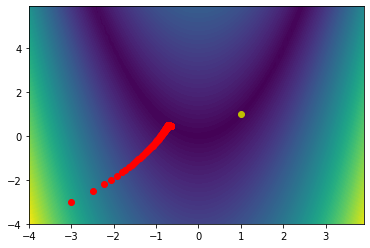

[-0.65694267  0.43507802]


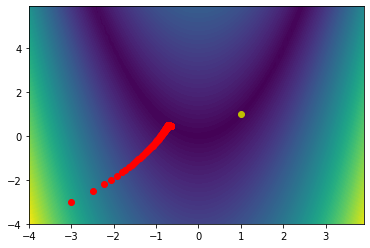

[-0.65694267  0.43507802]


In [6]:
print(optimize(tf.keras.optimizers.Adagrad(learning_rate=0.5)))

# Your implementation of Adagrad
class Adagrad:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.sum_squared_gradients = 0  # Zero vector
    self.epsilon = 1e-7
      
  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    
    self.sum_squared_gradients = self.sum_squared_gradients + (gradients**2)
    parameters.assign(parameters - (self.learning_rate/(np.sqrt(self.sum_squared_gradients + self.epsilon)))*(gradients)) 
    
print(optimize(Adagrad(learning_rate=0.5)))

# RMSProp

RMSProp is similar to Adagrad, but seeks to solve the problem of the decaying learning rate. Instead of storing a sum of all of the past squared gradients, RMSprop keeps a exponentially decaying running average:

The running average is updated as follows:
$$ g_t^{(i)} = \rho g_{t-1}^{(i)} +  (1 - \rho) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2 $$

Then, the parameter update is the same as for Adagrad. Dividing the learning rate by this exponential average will cause the learning to speed up in directions with lower gradients. This is what we want when navigating the valley of the Rosenbrock function. 

$$
\theta_t^{(i)} = \theta_{t-1}^{(i)} - \frac{\alpha}{\sqrt{g^{(i)}_t + \epsilon}} * \frac{\partial}{\partial\theta^{(i)}}L(\theta_{t-1})
$$

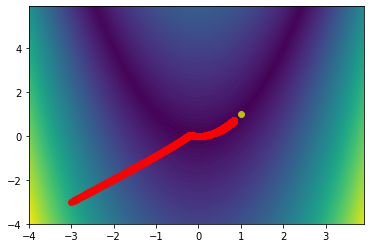

[0.8433816 0.6973202]


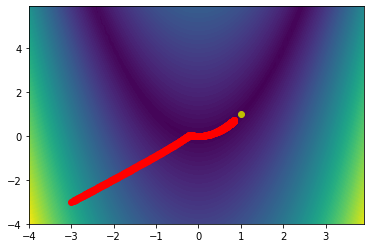

[0.8433373 0.6972459]


In [7]:
# Tensorflow implementation of RMSprop
print(optimize(tf.keras.optimizers.RMSprop(learning_rate=0.01)))

# Your implementation of RMS prop
class RMSprop:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.rho = 0.9  # Scaling factor for exponential average
    self.mean_square = 0  # Zero vector
      
  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    
    self.mean_square = self.mean_square*self.rho + (1-self.rho)*(gradients**2) 
    parameters.assign(parameters - (self.learning_rate/(np.sqrt(self.mean_square + self.epsilon)))*(gradients))
    
print(optimize(RMSprop(learning_rate=0.01)))

# Adam (Adaptive Moment Estimation) Optimizer

Adam is an iteration of previous algorithms that calculates the individual adaptive learning rate for each parameter from estimates of first and second moments of the gradients.

The first moment is the expected value of the gradients, and the second moment is the expected value of the square of the gradients. Adam uses exponentially decaying averages to estimate these moments based on past gradients. $\beta_1$ and $\beta_2$ are the scaling factors for the exponential average, and the default values are $\beta_1=0.9$ and $\beta_2=0.999$.

$$m^{(i)}_t = \beta_1 m_{t-1} + (1 - \beta_1) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)$$
$$v^{(i)}_t = \beta_2 v_{t-1} + (1 - \beta_2) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2$$

However, these estimates are biased towards 0, so Adam scales them as follows:

$$\hat{m} = \frac{m}{1-\beta_1^t}$$

$$\hat{v} = \frac{v}{1-\beta_2^t}$$


The parameter update for Adam is then:

$$ \theta_t^{(i)} = \theta_{t-1}^{(i)} - \alpha * \frac{\hat{m}^{(i)}_t}{\sqrt{\hat{v}^{(i)}_t} + \epsilon} $$

Notice that the first moment is similar to the momentum in SGD with momentum, and the second moment is similar to the sum of squared gradients in RMSprop.

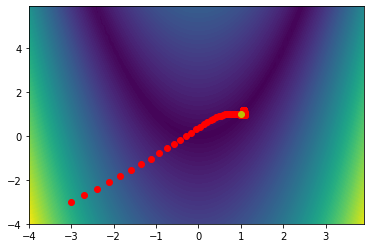

[1.0547324 1.1125813]


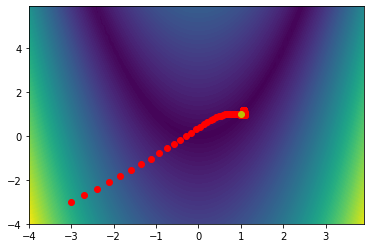

[1.0547329 1.112582 ]


In [8]:
print(optimize(tf.keras.optimizers.Adam(learning_rate=0.3)))

# Your implementation of Adam
class Adam:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.beta_1 = 0.9
    self.beta_2 = 0.999
    
    self.m = 0  # First moment zero vector
    self.v = 0  # Second moment zero vector.
    self.t = 0  # Time counter
      
  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    self.t += 1

    self.m = self.beta_1*self.m + (1-self.beta_1)*(gradients)
    self.v = self.beta_2*self.v + (1-self.beta_2)*(gradients**2)
    
    m_hat = self.m/(1-(self.beta_1**self.t))
    v_hat = self.v/(1-(self.beta_2**self.t))
    parameters.assign(parameters - self.learning_rate*(m_hat/(tf.sqrt(v_hat)+self.epsilon)))
    
print(optimize(Adam(learning_rate=0.3)))
